# Transformada de Fourier

A transformada de Fourier no intervalo contínuo é dada pelas equações:

$$H(f) = \int_{-\infty}^{+\infty}h(t)e^{2\pi i f t}dt\tag{1}$$
$$h(t) = \int_{-\infty}^{+\infty}H(f)e^{-2\pi i f t}df\tag{2}$$

Se t é medido em segundos, então f é medido em ciclos por segundo. Porém, invés de t podemos usar uma posição x medida em metros. Desta forma, f seria o inverso do comprimento de onda, medido em ciclos por metro. E assim por diante.

Em programação, porém, não existe o intervalo contínuo, sendo todos dados discretos, mesmo que o intervalo entre os pontos seja pequeno o suficiente para representar a frequência procurada.

Vamos supor agora que o intervalo dos pontos seja maior que o período da oscilação.

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

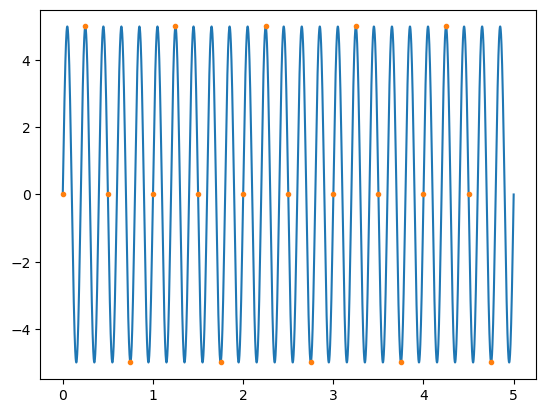

In [2]:
t1 = np.linspace(0, 5, 5000)
t2 = np.arange(0, 5, 0.25)
h1 = 5*np.sin(2*np.pi*5*t1)
h2 = 5*np.sin(2*np.pi*5*t2)
plt.plot(t1, h1)
plt.plot(t2, h2, '.')

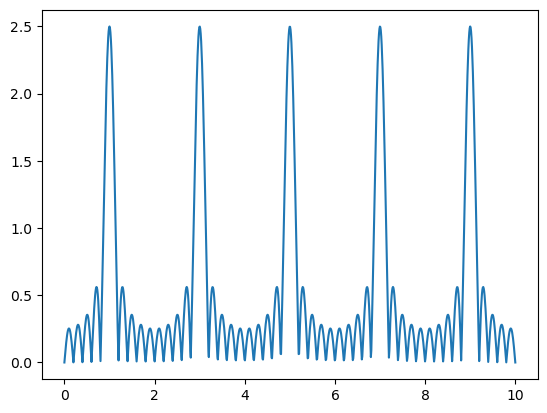

In [3]:
# Aplicando a metodologia
nf = np.linspace(0,10,1000)
H = np.zeros(len(nf))
for i in range(len(nf)):
    x = h2*np.cos(2*np.pi*nf[i]*t2)
    y = h2*np.sin(2*np.pi*nf[i]*t2)
    H[i] = np.sqrt(x.mean()**2 + y.mean()**2)
plt.plot(nf, H)

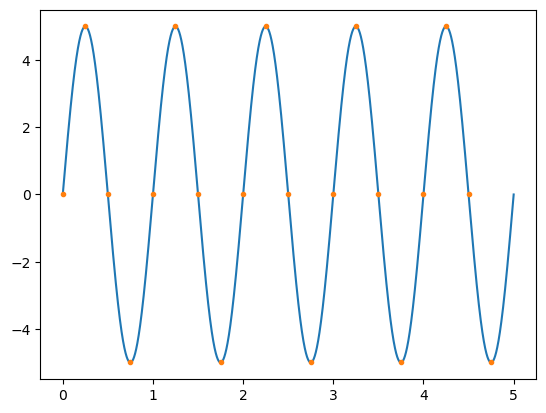

In [4]:
h = 5*np.sin(2*np.pi*1*t1)
plt.plot(t1, h)
plt.plot(t2, h2, '.')

Neste caso, nós conseguimos obter a frequência emitida como uma das frequências corretas, mas obtemos muitas outras soluções. Isso acontece quando os dados são discretos e procuramos frequências menores que a frequência dos dados.

Na verdade, supondo um intervalo constante entre os pontos de $\Delta t$, a maior frequência que pode ser determinada é dada ple frequência crítica de Nyquist, dada por:

$$f_c = \frac{1}{2\Delta t}$$

## Transformada de Fourier Discreta (DFT)

Em uma grande maioria dos casos, os dados $h(t)$ são obtidos de forma discreta e igualmente espaçados no tempo. Desta forma, podemos definir o intevalo de tempo entre os pontos como $\Delta$. Com isso, os pontos podem ser ordenados com números inteiros.

$$h_k = h(k\Delta) ~~~~~~ k=0,1,2,3,\cdot\cdot\cdot, N - 1$$

Supondo um número de N pontos, o máximo de frequências que podem ser testadas também será N. Dentro do intervalo permitido pela frequência crítica de Nyquist, as frequências a serem testadas são:

$$f_n = \frac{n}{N\Delta} ~~~~~~ n=-\frac{N}{2},-\frac{N}{2}+1,\cdot\cdot\cdot, \frac{N}{2}-1, \frac{N}{2}$$

Utilizando essas condições, podemos converter a equação 1 em uma soma discreta:

$$H(f_n) = \int_{-\infty}^{+\infty}h(t)e^{2\pi i f_n t}dt \to H(f_n) = \sum_{k=0}^{N-1}h_ke^{2\pi i n k/N}\Delta \to H(f_n) = \Delta\sum_{k=0}^{N-1}h_ke^{2\pi i n k/N}$$

Com isso, como o intervalo de tempo é uma constante, vamos definir $H(f_n) = \Delta H_n$. Logo:

$$H_n =  \sum_{k=0}^{N-1}h_ke^{2\pi i n k/N}\tag{3}$$

## Fast Fourier Transform (FFT)

A equação 3 permite fazer as operações para determinar as transformada de Fourier para as diferentes frequências de um conjunto de dados com intervalo equispaçado. Porém, é um processo computacional custoso. Até a década de 1960 essa era a única forma de se calcular DFT. Retrospectivamente, se descobriu que várias pessoas já haviam descoberto formas mais ágeis de calcular DFT, inclusive Gauss em 1805. Abaixo é demostrado o método obtido por Danielson and Lanczos em 1942.

Vamos supor uma nova variável $j$ que conta metade dos pontos utilizados. ou seja $j=0,1,2,3,\cdot\cdot\cdot, N/2-1$. Podemos reescrever a equação 3 separando a soma dos elementos pares dos elementos ímpares:

$$H_n =  \sum_{j=0}^{N/2-1}h_{2j}e^{2 \pi i n (2 j)/N} + \sum_{j=0}^{N/2-1}h_{(2j+1)}e^{2 \pi i n (2 j+1)/N}$$
$$H_n =  \sum_{j=0}^{N/2-1}h_{2j}e^{2 \pi i n j/(N/2)} + \sum_{j=0}^{N/2-1}h_{(2j+1)}e^{2 \pi i n j/(N/2)}e^{2 \pi i n /N}$$
$$H_n =  \sum_{j=0}^{N/2-1}h_{2j}e^{2 \pi i n j/(N/2)} + e^{2 \pi i n /N}\sum_{j=0}^{N/2-1}h_{(2j+1)}e^{2 \pi i n j/(N/2)}\tag{4}$$

Notem que os dois somatórios são duas transformadas de Fourier, onde cada uma opera sobre os elementos pares e a outra sobre os elementos ímpares. A equação 4, apesar de mais complicada que a equação 3, agiliza significativamente o processamento.

## Efeito Doppler

O efeito Doppler é a variação da frequência recebida em relação à frequência emitida devido à diferença de velocidade entre o emissor e o receptor. Supondo que o receptor está parado, $v$ é a velocidade do emissor em relação ao receptor e $v_s$ é a velocidade do som, as frequências recebidas quando o emissor está se aproximando ($f_1$) e quando ele está se afastando são:

Aproximando: $$f_1 = \frac{v_s}{v_s - v}f_0$$
Afastando: $$f_2 = \frac{v_s}{v_s + v}f_0$$

Se soubermos identificar $f_1$ e $f_2$, podemos obter a velocidade do objeto:

$$f_1(v_s - v) = v_sf_0$$
$$f_2(v_s + v) = v_sf_0$$
$$f_1(v_s - v) = f_2(v_s + v)$$
$$v(f_1 + f_2) = v_s(f_1 - f_2)$$
$$v = v_s\frac{f_1 - f_2}{f_1 + f_2}$$

Para testar este modelo, iremos utilizar um áudio de um trem se aproximando e se afastando, determinar as frequências recebidas e determinar a velocidade do trem.

In [5]:
import scipy.io.wavfile as wav
import IPython

In [6]:
# Para baixar o áudio, utilizamos o seguinte comando,
# que não é comando de python, mas de sistema linux
!wget https://www.numfys.net/media/notebooks/files/2wa_lwrhuntrd_ns197.wav

--2023-11-03 18:43:27--  https://www.numfys.net/media/notebooks/files/2wa_lwrhuntrd_ns197.wav
Resolving www.numfys.net (www.numfys.net)... 35.173.69.207
Connecting to www.numfys.net (www.numfys.net)|35.173.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3838508 (3.7M) [audio/x-wav]
Saving to: ‘2wa_lwrhuntrd_ns197.wav.1’

2wa_lwrhuntrd_ns197 100%[===================>]   3.66M  4.22MB/s    in 0.9s    

2023-11-03 18:43:28 (4.22 MB/s) - ‘2wa_lwrhuntrd_ns197.wav.1’ saved [3838508/3838508]



In [7]:
# Este comando permite ouvir o áudio a partir de um jupyter notebook
IPython.display.Audio('2wa_lwrhuntrd_ns197.wav')

In [8]:
# Leitura do áudio
# Fs é a taxa de dados por segundo
Fs, ystereo = wav.read('2wa_lwrhuntrd_ns197.wav', 'r')

In [9]:
# O áudio possui dois arrays, um para o ouvido direito, outro para o ouvido esquerdo
ymono = (ystereo[:,0] + ystereo[:,1])/2

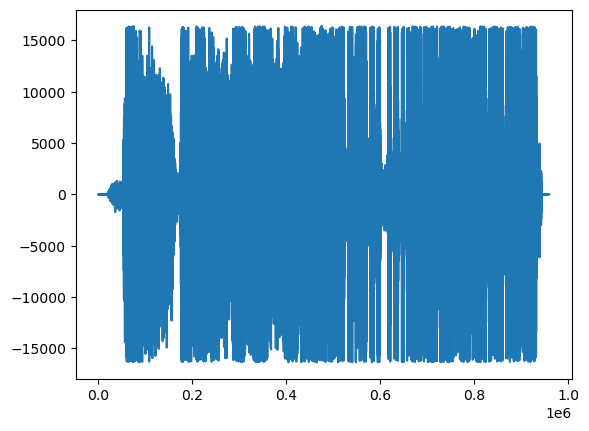

In [10]:
plt.plot(ymono)

In [11]:
# Normalizamos o sinal
ymono = ymono/max(abs(ymono))

In [12]:
# Determinamos o intervalo de tempo entre cada dado do áudio.
deltat = 1/Fs

In [13]:
# Utilizaremos apenas 80000 pontos já previamente separados para a aproximação e para o afastamento.
N=80000        # Number of samplings in sample1 and sample2
sample1 = ymono[190000:N+190000]
sample2 = ymono[320000:N+320000]

In [14]:
# Para fazer a Transformada de Fourier, utilizamos a função fft
from numpy.fft import fft
p1 = fft(sample1)
p2 = fft(sample2)

In [15]:
p1

array([ 14.02343822+0.j        , -29.40213613-9.49744765j,
         3.42275234+4.56334068j, ...,   6.13602445-2.74957731j,
         3.42275234-4.56334068j, -29.40213613+9.49744765j])

Em p1 temos as amplitudes do cosseno (real) e do seno (imaginário)

A magnitude é calculada pelo quadrado dos valores

In [16]:
P1 = (p1*p1.conjugate()).real
P2 = (p2*p2.conjugate()).real

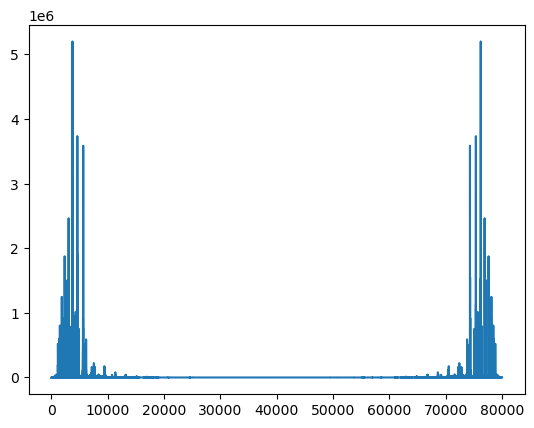

In [17]:
plt.plot(P1)

A simetria é esperada. Isso se deve às frequências indo de negativo a positivo. Porém, os sinais negativos são os primeiros.

In [18]:
# As frequências precisam ser determinadas porque o FFT foi feito em cima dos dados sem conhecimento do tempo.
f = np.linspace(0,N-1,N)/(N*deltat)

(0.0, 1000.0)

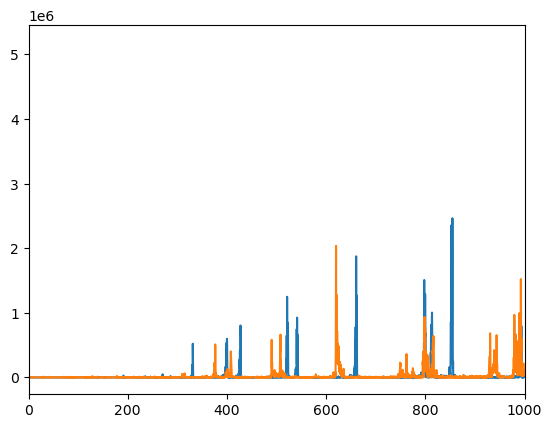

In [19]:
# Visualizamos os dados em função da frequência
plt.plot(f, P1)
plt.plot(f, P2)
plt.xlim(0, 1000)

In [20]:
# Vamos utilizar apenas o intervalo entre as frequências 600 e 700 ciclos por segundo para determinar a velocidade,
# pois são duas frequências bem separadas e óbvias
region = np.where((f > 600) & (f < 700))

In [21]:
# Identificamos neste intervalo onde há a maior magnitude nas frequências quando o trem está se aproximando.
P1[region].argmax()

219

In [22]:
# Pegamos a frequência para maior magnitude
f1 = f[region][219]

In [23]:
# Agora fazemos o mesmo para quando o tem está se afastando
P2[region].argmax()

72

In [24]:
f2 = f[region][72]

In [25]:
# Velocidade do Som
vs = 340.29 # m/s

In [26]:
# Determinamos a velocidade do trem:
v = vs*(f1-f2)/(f1+f2)
print(v, 'm/s')

10.76913455328308 m/s


Calculamos a velocidade apenas a partir de uma frequência. Para verificar, vamos utilizar a velocidade calculada para determinar as frequências emitidas quando ele se aproxima e quando se afasta. Elas deveriam ser iguais.

In [27]:
f0_1 = f*(vs - v)/vs
f0_2 = f*(vs + v)/vs

(500.0, 1000.0)

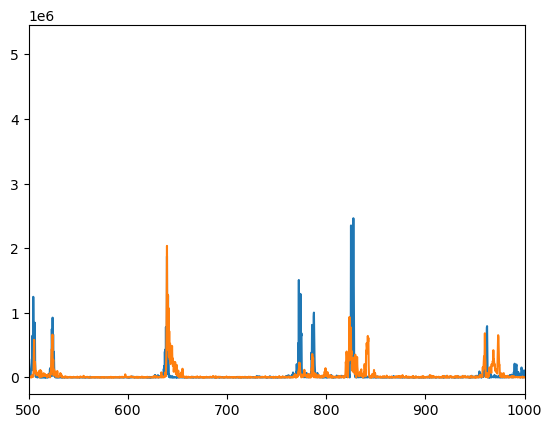

In [28]:
plt.plot(f0_1, P1)
plt.plot(f0_2, P2)
plt.xlim(500, 1000)

Vemos que as frequências emitidas obtidas a partir dos dois trechos batem nos dois trechos, apesar de não bater as magnitudes.